Hotel Booking Demand Datasets: Nuno Antonio, Ana Almeida, Luis Nunes, Data in Brief, 2019
Collection methodology

Data was downloaded from: https://www.sciencedirect.com/science/article/pii/S2352340918315191 and cleaned by Thomas Mock and Antoine Bichat as part of #TidyTuesday

- Have you ever wondered when the best time of year to book a hotel room is? 
- Or the optimal length of stay in order to get the best daily rate? 
- What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

In [7]:
#path


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# Importing the dataset

dataset = pd.read_csv("hotel_bookings.csv")

In [8]:
dataset.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
56931,City Hotel,1,36,2016,September,38,15,0,3,2,...,No Deposit,9.0,NaN,0,Transient,207.9,0,3,Canceled,2016-09-04
55446,City Hotel,1,212,2016,August,33,13,1,1,2,...,Non Refund,1.0,NaN,0,Transient,96.0,0,0,Canceled,2016-08-03
41451,City Hotel,0,3,2015,August,34,16,2,1,2,...,No Deposit,14.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-08-19
11586,Resort Hotel,1,207,2017,May,20,19,2,2,2,...,No Deposit,240.0,NaN,0,Transient,117.0,0,1,Canceled,2016-12-04
44388,City Hotel,0,40,2015,October,41,5,1,1,2,...,No Deposit,3.0,NaN,40,Transient-Party,70.0,0,0,Check-Out,2015-10-07
15097,Resort Hotel,1,214,2015,October,40,3,1,1,2,...,No Deposit,208.0,NaN,0,Transient,34.0,0,0,Canceled,2015-06-09
45644,City Hotel,0,140,2015,November,47,18,0,3,1,...,No Deposit,29.0,NaN,87,Transient-Party,65.0,0,0,Check-Out,2015-11-21
75788,City Hotel,1,323,2015,September,36,5,2,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,62.0,0,0,Canceled,2015-07-06
66189,City Hotel,1,87,2017,April,15,15,2,2,2,...,Non Refund,1.0,NaN,0,Transient,95.0,0,0,Canceled,2017-01-18
60922,City Hotel,1,155,2016,November,48,25,2,2,2,...,No Deposit,9.0,NaN,0,Transient,85.0,0,1,Canceled,2016-11-20


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [10]:
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


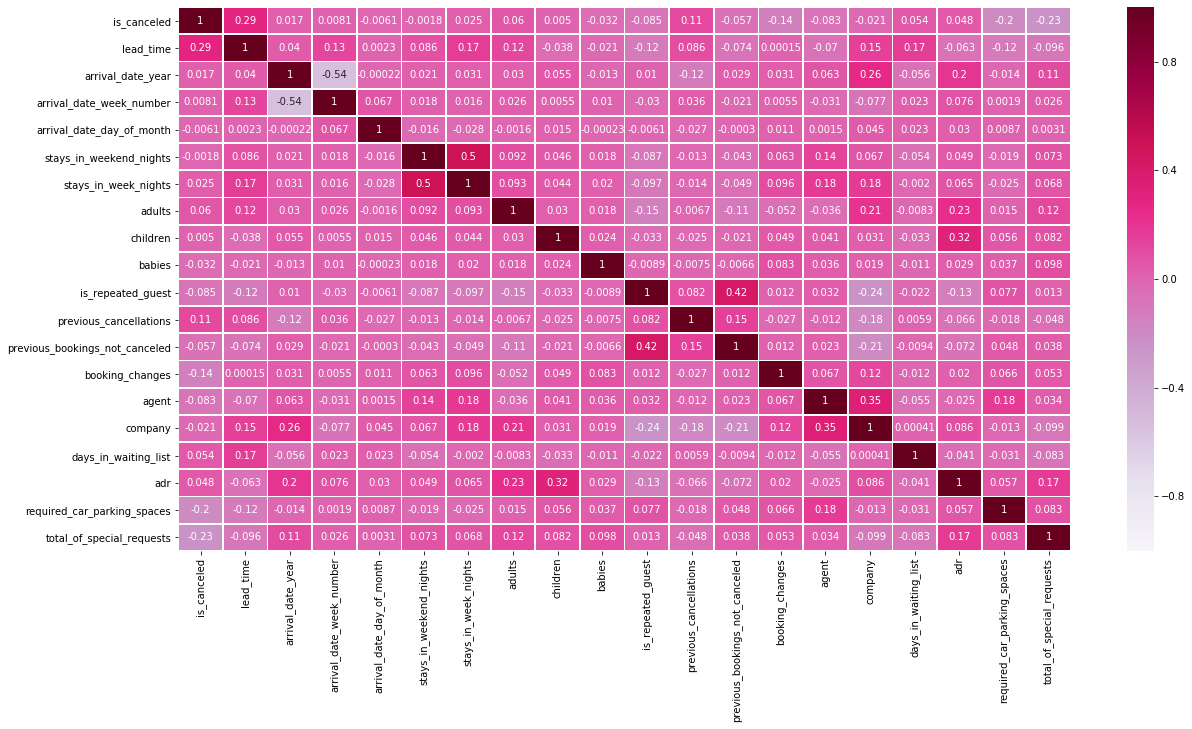

In [11]:
dataset.corr()
plt.rcParams['figure.figsize']=(20,10)
sns.heatmap(dataset.corr(), vmax=1., vmin=-1., annot=True, linewidths=.8, cmap="PuRd");

In [12]:
dataset.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [13]:
def missing():
    for column in dataset.columns:
        missing_data = column, dataset[column].isnull().sum()
        if missing_data[1] == 0: continue

        print(missing_data)
        
missing()

('children', 4)
('country', 488)
('agent', 16340)
('company', 112593)


In [14]:
dataset = dataset.fillna(-1)

In [17]:
feats = dataset.select_dtypes(include=['integer']).columns.values
feats

array(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests'], dtype=object)

C:\Users\Justyna_Boczon-Fiedz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Justyna_Boczon-Fiedz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


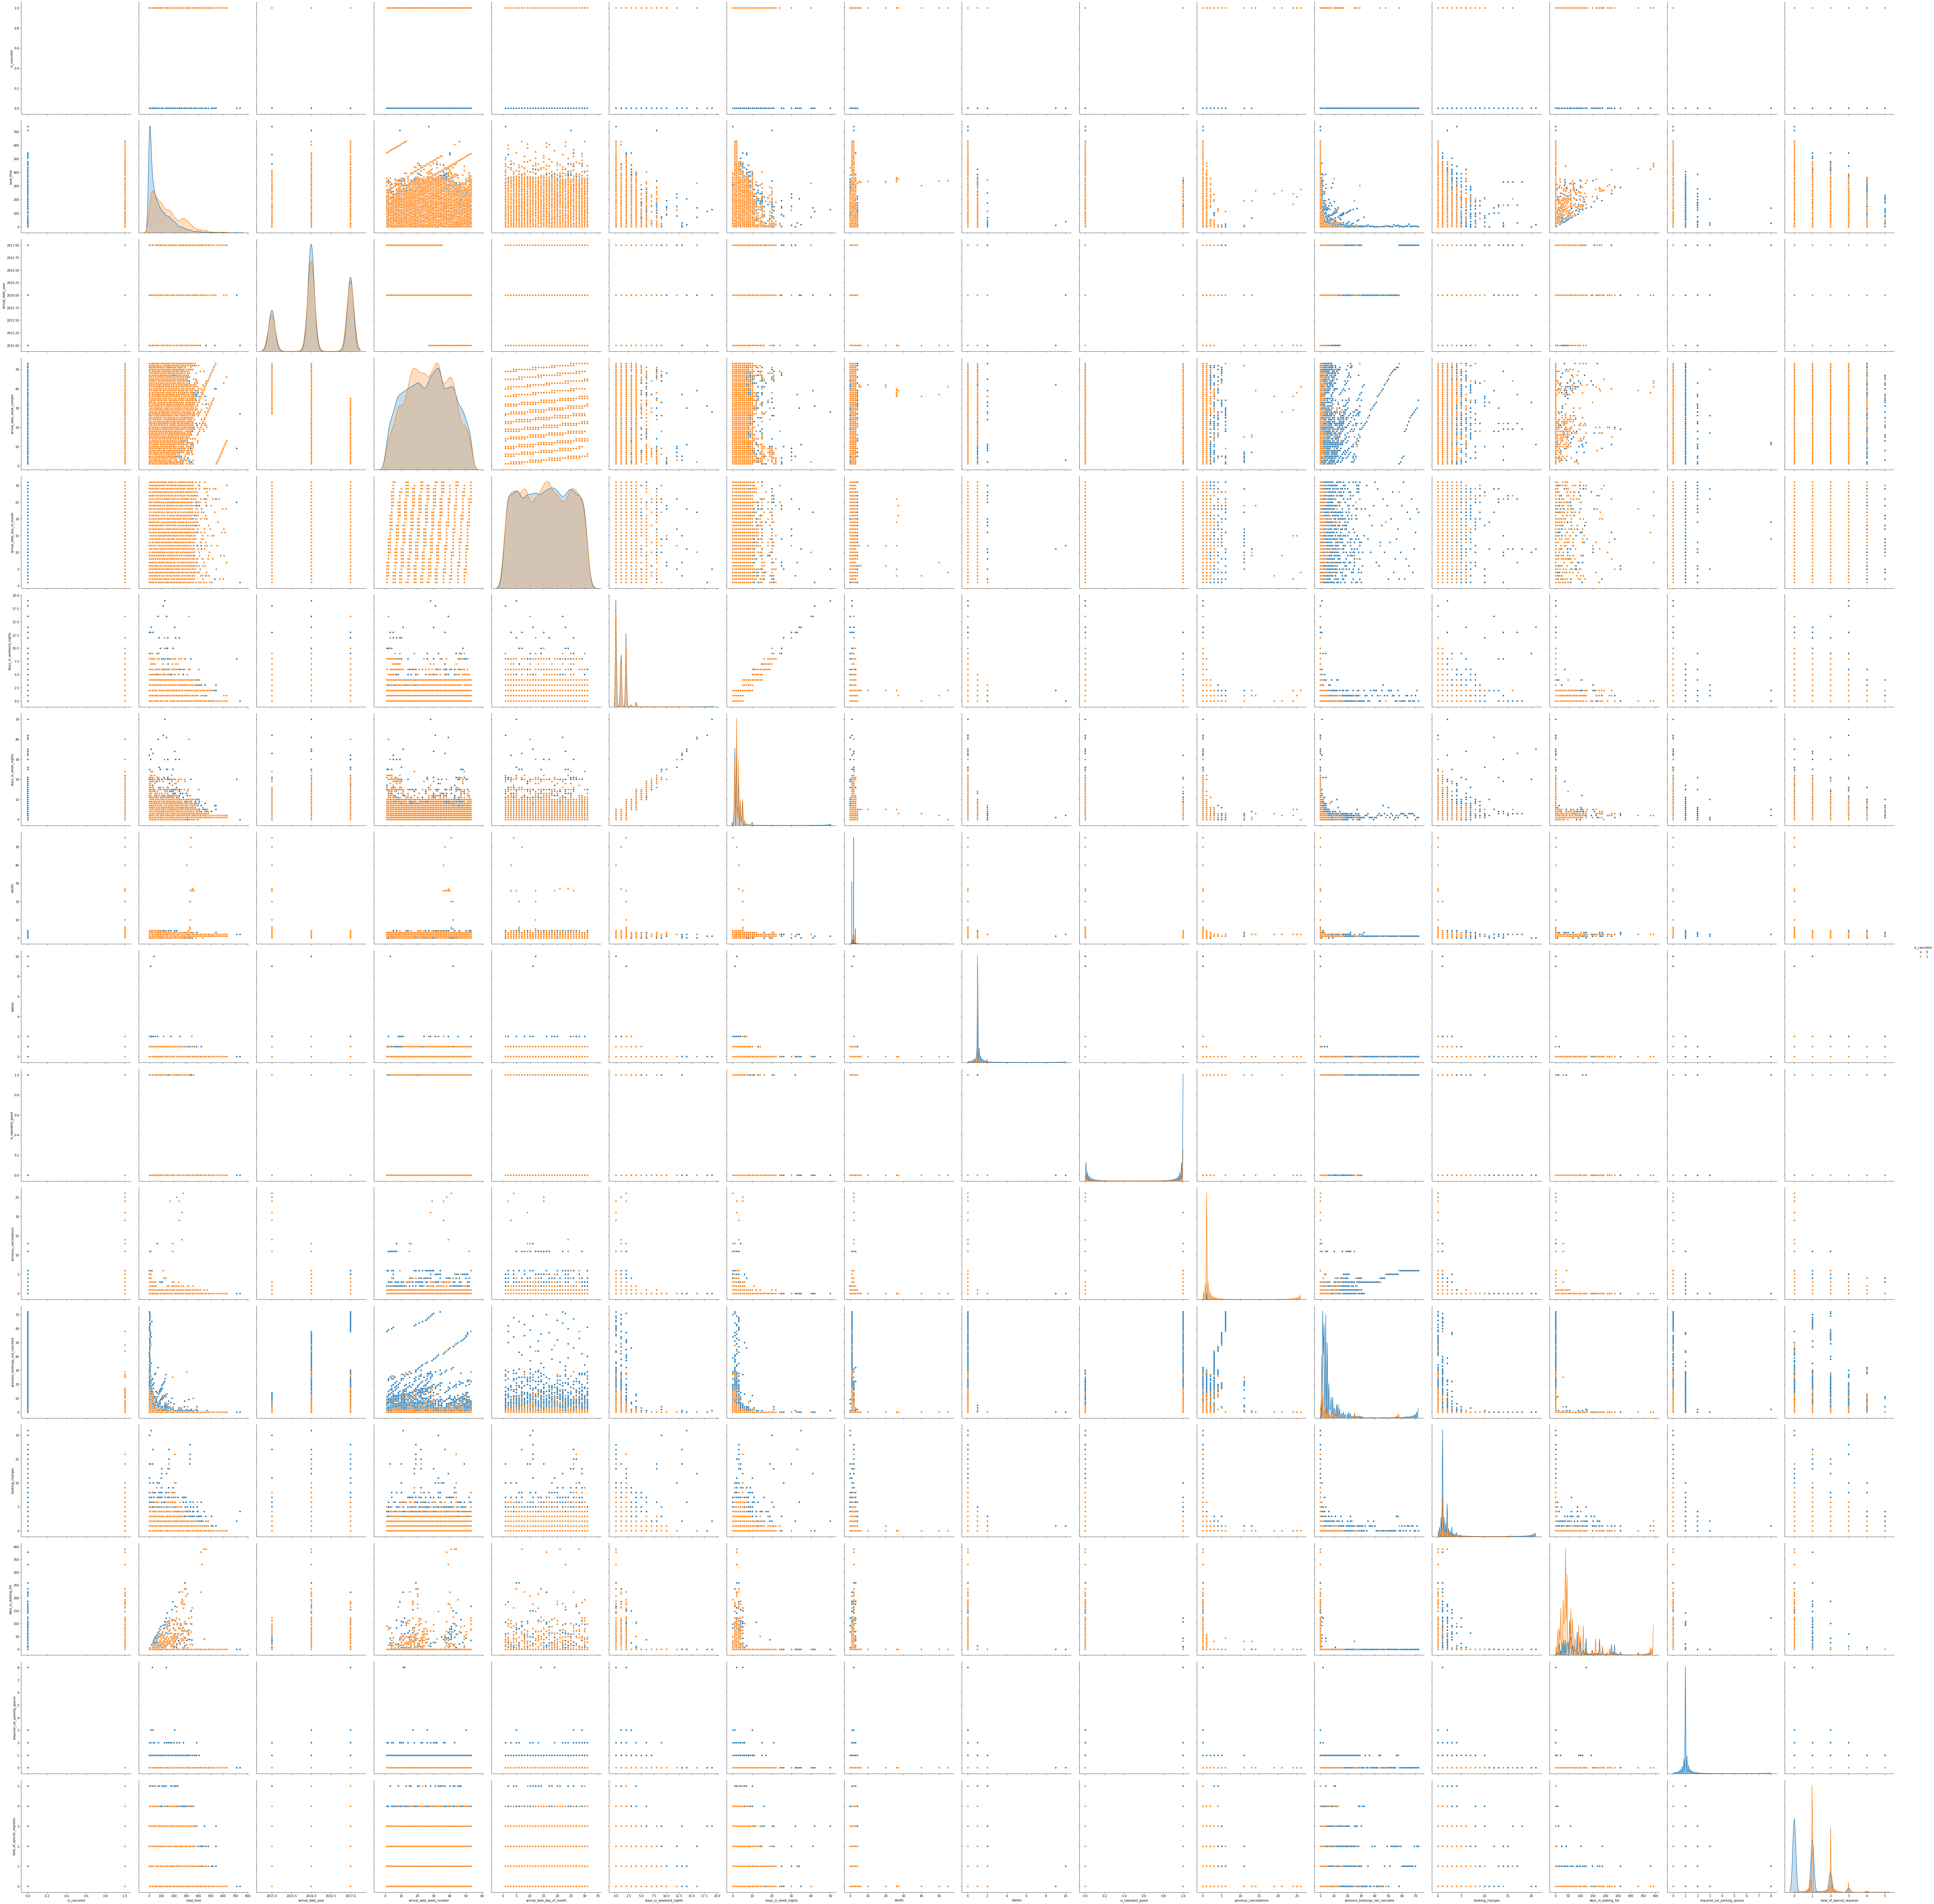

In [20]:
sns.pairplot(dataset[feats], height = 5.5, hue = 'is_canceled')

In [ ]:
#cat_feats = dataset.select_dtypes(include=[np.object]).columns

#for cat_feat in cat_feats:
    #dataset['{0}_cat'.format(cat_feat)] = pd.factorize( dataset[cat_feat] )[0]